In [3]:
#from google.colab import drive
#from google.colab import files
import os
from lib.train_AI_lib import *

In [5]:
#os.chdir('..')
print(os.getcwd())

/content/APS360-2020Summer-Project


In [19]:
import cv2
#### Filters we want to use ####
edgeDetect  = lambda oImg: cv2.Canny(oImg, 100, 100)
edgeDetect2 = lambda fImg: cv2.Canny(fImg, 175, 250)
laplacian   = lambda pImg: cv2.Laplacian(cv2.cvtColor(pImg, cv2.COLOR_BGR2GRAY),cv2.CV_64F)
gradient    = lambda gImg: cv2.morphologyEx(cv2.cvtColor(gImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_GRADIENT, (5,5))
opening     = lambda cImg: cv2.morphologyEx(cv2.cvtColor(cImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_OPEN, kernel)
bilateral   = lambda bImg: cv2.bilateralFilter(cv2.cvtColor(bImg, cv2.COLOR_BGR2GRAY),9,100,100)

In [7]:
class CNN(nn.Module):
    def __init__(self, name):
        super(CNN, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(1,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

## Edge Detection

In [22]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect})

In [8]:
torch.cuda.is_available()

True

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 101.62s | Training Error: 0.9842951059, Training loss: 23.2233907680 | Validation Error: 0.9678362573, Validation loss: 19.5890453122
Epoch 1 | Time Taken: 85.17s | Training Error: 0.9824689554, Training loss: 19.4628399548 | Validation Error: 0.9941520468, Validation loss: 18.6564384859
Epoch 2 | Time Taken: 83.42s | Training Error: 0.9839298758, Training loss: 18.0463778439 | Validation Error: 0.9795321637, Validation loss: 17.2906089724
Epoch 3 | Time Taken: 82.49s | Training Error: 0.9769905040, Training loss: 17.1726068432 | Validation Error: 0.9795321637, Validation loss: 16.3200289931
Epoch 4 | Time Taken: 82.95s | Training Error: 0.9780861943, Training loss: 16.4561490809 | Validation Error: 0.9619883041, Validation loss: 15.5484328715
Epoch 5 | Time Taken: 83.04s | Training Error: 0.9715120526, Training loss: 15.0090136423 | Validation Error: 0.9736842105, Validation loss: 14.8259470795
Epoch 6 | Time Taken: 83.47s 

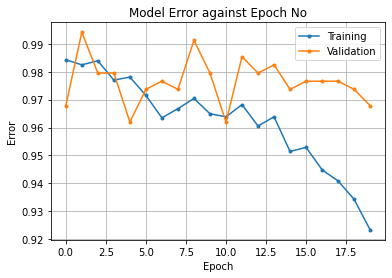

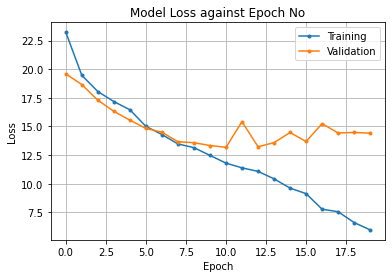

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [23.223390768023254,
  19.462839954765048,
  18.04637784389275,
  17.172606843160608,
  16.456149080871853,
  15.009013642251494,
  14.294841923234632,
  13.472122935059291,
  13.146988071087396,
  12.470741201471391,
  11.79758205036916,
  11.383744064643917,
  11.07619244521494,
  10.42679281661405,
  9.614258198894264,
  9.132759108197511,
  7.773553349669371,
  7.551252846205387,
  6.610477201877499,
  5.965589611148282],
 [19.589045312231868,
  18.656438485871178,
  17.290608972384973,
  16.320028993101428,
  15.54843287149578,
  14.825947079487209,
  14.49802980819893,
  13.663573321701934,
  13.58135026652891,
  13.33456211785749,
  13.175370567786686,
  15.416722562971328,
  13.229079781212608,
  13.583707672027407,
  14.47344969875974,
  13.684836717991605,
  15.241776183307339,
  14.42845363404539,
  14.474411008821411,
  14.409429302787506],
 [0.9842951059167275,
  0.9824689554419284,
  0.9839298758217

In [10]:
my_model = CNN(name = "edgeDetect")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

## Edge Detection v2

In [41]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect2})

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 151.75s | Training Error: 0.9875821768, Training loss: 24.5651798530 | Validation Error: 0.9795321637, Validation loss: 19.5236781488
Epoch 1 | Time Taken: 147.59s | Training Error: 0.9872169467, Training loss: 19.2904808077 | Validation Error: 0.9853801170, Validation loss: 18.3829247838
Epoch 2 | Time Taken: 147.37s | Training Error: 0.9795471147, Training loss: 18.6128447361 | Validation Error: 0.9736842105, Validation loss: 17.8277928365
Epoch 3 | Time Taken: 148.78s | Training Error: 0.9806428050, Training loss: 17.9876826970 | Validation Error: 0.9678362573, Validation loss: 17.4524126520
Epoch 4 | Time Taken: 148.61s | Training Error: 0.9799123448, Training loss: 18.2368817682 | Validation Error: 0.9941520468, Validation loss: 17.3217463101
Epoch 5 | Time Taken: 150.12s | Training Error: 0.9773557341, Training loss: 17.3484235610 | Validation Error: 0.9853801170, Validation loss: 19.7254337689
Epoch 6 | Time Taken: 15

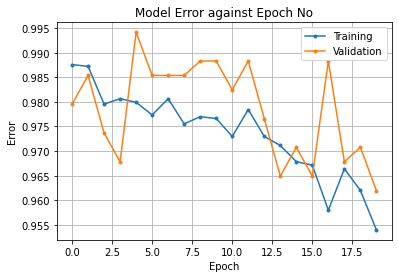

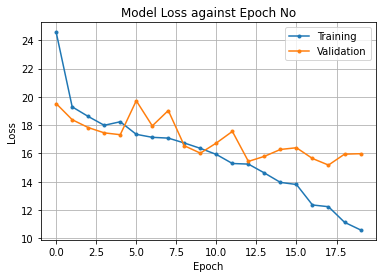

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [24.56517985301888,
  19.290480807684105,
  18.612844736052278,
  17.98768269696257,
  18.236881768191584,
  17.34842356099444,
  17.136723507506655,
  17.081217460558157,
  16.735208984544244,
  16.3581023889813,
  15.927184066195913,
  15.28664802081041,
  15.244312879508328,
  14.616854360611356,
  13.949606980230056,
  13.802212403382853,
  12.354922057055981,
  12.23158962784908,
  11.1315453689228,
  10.59119960045986],
 [19.523678148754232,
  18.382924783781796,
  17.827792836495135,
  17.45241265198787,
  17.32174631006874,
  19.725433768900274,
  17.945510771973307,
  19.032237251528603,
  16.541373219182745,
  16.018610924190874,
  16.734987360875454,
  17.55544417443138,
  15.434450232283423,
  15.792290260213038,
  16.279601850210195,
  16.39955127381301,
  15.640125801948125,
  15.175155834924984,
  15.946502199392866,
  15.979112342367458],
 [0.987582176771366,
  0.9872169466764061,
  0.979547114682

In [42]:
my_model = CNN(name = "edgeDetect2")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

## laplacian

In [6]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': laplacian})

In [7]:
my_model = CNN(name = "laplacian")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 156.13s | Training Error: 0.9828341855, Training loss: 48.5078520143 | Validation Error: 0.9795321637, Validation loss: 18.5424154991
Epoch 1 | Time Taken: 154.92s | Training Error: 0.9751643535, Training loss: 16.8590210011 | Validation Error: 0.9766081871, Validation loss: 16.6706116695


KeyboardInterrupt: 

## gradient

In [29]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': gradient})

In [ ]:
my_model = CNN(name = "gradient")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

## opening

In [26]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': opening})

In [28]:
my_model = CNN(name = "opening")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

CUDA is available!  Training on GPU ...


UnboundLocalError: local variable 'img' referenced before assignment

## Bilateral

In [43]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': bilateral})

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 273.12s | Training Error: 0.9846603360, Training loss: 22.2752162961 | Validation Error: 0.9707602339, Validation loss: 17.7499233347
Epoch 1 | Time Taken: 270.68s | Training Error: 0.9733382031, Training loss: 16.1076981331 | Validation Error: 0.9766081871, Validation loss: 14.1840102273
Epoch 2 | Time Taken: 271.89s | Training Error: 0.9726077429, Training loss: 14.4680807990 | Validation Error: 0.9707602339, Validation loss: 13.7571751309
Epoch 3 | Time Taken: 271.30s | Training Error: 0.9726077429, Training loss: 13.6206520587 | Validation Error: 0.9766081871, Validation loss: 13.9027506680
Epoch 4 | Time Taken: 275.87s | Training Error: 0.9718772827, Training loss: 13.7901353967 | Validation Error: 0.9736842105, Validation loss: 13.0579747562
Epoch 5 | Time Taken: 274.93s | Training Error: 0.9653031410, Training loss: 12.6099162684 | Validation Error: 0.9619883041, Validation loss: 12.8070499577
Epoch 6 | Time Taken: 27

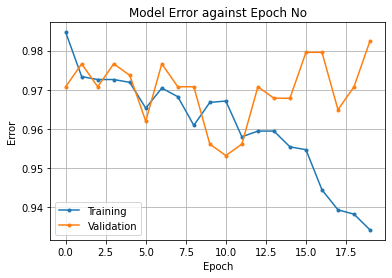

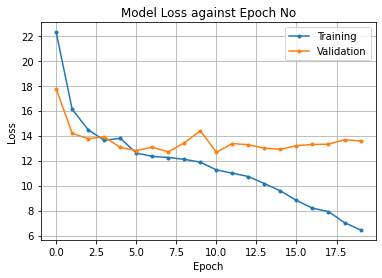

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [22.27521629611813,
  16.10769813312719,
  14.46808079898295,
  13.620652058692873,
  13.790135396715396,
  12.609916268431906,
  12.338786576186314,
  12.249668556802504,
  12.102866843006495,
  11.878328101192174,
  11.258733646661723,
  10.996005117186888,
  10.727989769017277,
  10.16438471356004,
  9.579212062921618,
  8.814639763366836,
  8.200674160904153,
  7.9194377024507805,
  7.036965064410871,
  6.454680671101366],
 [17.749923334676584,
  14.184010227339142,
  13.757175130870952,
  13.902750667952509,
  13.057974756221144,
  12.807049957735764,
  13.076478571302289,
  12.704790004747007,
  13.417358038859295,
  14.393033671866208,
  12.66900503060383,
  13.367032409290372,
  13.271116700560345,
  12.992377894393277,
  12.909170194472736,
  13.19668615480061,
  13.29462992164197,
  13.315642301465152,
  13.673134428598992,
  13.574248794113252],
 [0.9846603360116873,
  0.9733382030679328,
  0.972607742

In [44]:
my_model = CNN(name = "bilateral")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

# Filter Testing

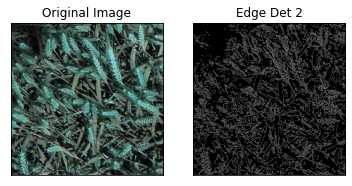

In [21]:
filepath = '/content/APS360-2020Summer-Project/data/working-wheat-data/train/0a3cb453f.jpg'

# Edge Detect 2
img   = cv2.imread(filepath)
edges = cv2.Canny(img,175,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Det 2'), plt.xticks([]), plt.yticks([])
plt.show()

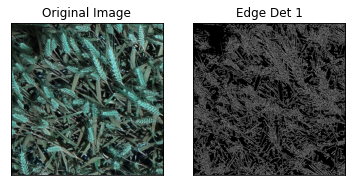

In [22]:
# Edge Detect 1
img   = cv2.imread(filepath)
edges = cv2.Canny(img,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Det 1'), plt.xticks([]), plt.yticks([])
plt.show()

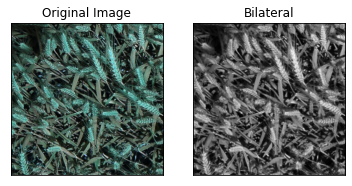

In [23]:
# Bilateral
img  = cv2.imread(filepath)
imgf = cv2.bilateralFilter(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),9,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('Bilateral'), plt.xticks([]), plt.yticks([])
plt.show()

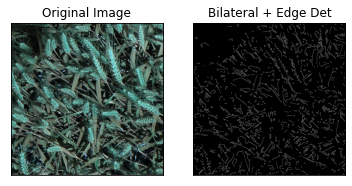

In [40]:
# Edge Det and Bilateral
img  = cv2.imread(filepath)
imgf = cv2.bilateralFilter(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),9,75,50)
imgf = cv2.Canny(imgf,125,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('Bilateral + Edge Det'), plt.xticks([]), plt.yticks([])
plt.show()